In [1]:
import json
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
from config import api_key

In [2]:
injury_df = pd.read_csv("injury_data.csv")
injury_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
0,0,6048,2012,1,1,Early Doucet,ARI,WR,--,False
1,1,6353,2012,1,1,Adam Snyder,ARI,G,Elbow,False
2,2,9319,2012,1,1,LaRod Stephens-Howling,ARI,RB,Groin,False
3,3,9323,2012,1,1,Chris Wells,ARI,RB,Hamstring,False
4,4,9782,2012,1,1,Gregory Toler,ARI,CB,Hip,False
...,...,...,...,...,...,...,...,...,...,...
55613,55613,21755,2020,1,7,Isaiah Wright,WAS,WR,Shoulder,True
55614,55614,21875,2020,1,7,James Smith-Williams,WAS,DE,Concussion,True
55615,55615,21955,2020,1,7,Thaddeus Moss,WAS,TE,Undisclosed,True
55616,55616,22008,2020,1,7,Saahdiq Charles,WAS,OL,Knee,True


In [3]:
injury_df['Body Part'].value_counts()

Knee                   10828
Ankle                   5801
Hamstring               4226
Shoulder                3851
Foot                    2619
                       ...  
Shoulder, Ankle            1
Suspension/covid-19        1
Knee, chest                1
Right Biceps               1
Hip, ribs                  1
Name: Body Part, Length: 503, dtype: int64

In [4]:
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion') & (injury_df['Body Part'] == 'Concussion, ankle')\
                              & (injury_df['Body Part'] == 'Concussion, eye') & (injury_df['Body Part'] == 'Concussion, hip')\
                              & (injury_df['Body Part'] == 'Concussion, illness') & (injury_df['Body Part'] == 'Concussion, stinger')\
                              & (injury_df['Body Part'] == 'Concussion, elbow') & (injury_df['Body Part'] == 'Concussion, knee, ankle')\
                              & (injury_df['Body Part'] == 'Concussion, hamstring') & (injury_df['Body Part'] == 'Concussion, finger')\
                              & (injury_df['Body Part'] == 'Concussion, chest') & (injury_df['Body Part'] == 'Concussion, left shoulder')\
                              & (injury_df['Body Part'] == 'Concussion, toe') & (injury_df['Body Part'] == 'Concussion, foot, thigh')\
                              & (injury_df['Body Part'] == 'Concussion, shoulder') & (injury_df['Body Part'] == 'Concussion, groin')\
                              & (injury_df['Body Part'] == 'Concussion, not injury related') & (injury_df['Body Part'] == 'Concussion, neck')\
                              & (injury_df['Body Part'] == 'Concussion, shoulder') & (injury_df['Body Part'] == 'Head')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive


In [5]:
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
75,75,8853,2012,1,1,Gerald Sensabaugh,DAL,DB,Concussion,False
89,89,14201,2012,1,1,Bill Bentley,DET,DB,Concussion,False
100,100,14608,2012,1,1,Terrell Manning,GB,LB,Concussion,False
164,164,12762,2012,1,1,Daniel Thomas,MIA,RB,Concussion,False
224,224,6304,2012,1,1,Darrelle Revis,NYJ,DB,Concussion,False
...,...,...,...,...,...,...,...,...,...,...
55416,55416,20971,2020,1,7,Andrew Van Ginkel,MIA,OLB,Concussion,False
55438,55438,16851,2020,1,7,Carl Davis Jr.,NE,DT,Concussion,True
55456,55456,17457,2020,1,7,Nick Easton,NO,OL,Concussion,True
55473,55473,19200,2020,1,7,C.J. Board,NYG,WR,Concussion,True


In [6]:
injury_df['Body Part'] = injury_df['Body Part'].replace(
    {'Concussion, ankle': 'Concussion', 'Concussion, eye': 'Concussion', 'Concussion, hip': 'Concussion', 'Concussion, illness': 'Concussion',\
    'Concussion, stinger': 'Concussion', 'Concussion, elbow': 'Concussion', 'Concussion, knee, ankle': 'Concussion','Concussion, hamstring': 'Concussion',\
    'Concussion, finger': 'Concussion', 'Concussion, chest': 'Concussion', 'Concussion, left shoulder': 'Concussion',\
    'Concussion, toe': 'Concussion', 'Concussion, foot, thigh': 'Concussion', 'Concussion, shoulder': 'Concussion',\
    'Concussion, groin': 'Concussion','Concussion, not injury related': 'Concussion', 'Concussion, neck': 'Concussion',\
    'Concusison': 'Concussion', 'Head': 'Concussion'})

In [7]:
concussion_df = injury_df.loc[(injury_df['Body Part'] == 'Concussion')]
concussion_df

,Unnamed: 0,Player ID,Season,Season Type,Week,Name,Team,Position,Body Part,Declared Inactive
15,15,8638,2012,1,1,Sean Considine,BAL,S,Concussion,False
33,33,12607,2012,1,1,Lorenzo Booker,CHI,RB,Concussion,False
44,44,9956,2012,1,1,Dan Skuta,CIN,LB,Concussion,False
75,75,8853,2012,1,1,Gerald Sensabaugh,DAL,DB,Concussion,False
89,89,14201,2012,1,1,Bill Bentley,DET,DB,Concussion,False
...,...,...,...,...,...,...,...,...,...,...
55416,55416,20971,2020,1,7,Andrew Van Ginkel,MIA,OLB,Concussion,False
55438,55438,16851,2020,1,7,Carl Davis Jr.,NE,DT,Concussion,True
55456,55456,17457,2020,1,7,Nick Easton,NO,OL,Concussion,True
55473,55473,19200,2020,1,7,C.J. Board,NYG,WR,Concussion,True


In [8]:
concussion_df['Body Part'].count()

2992

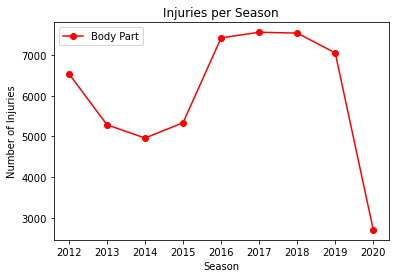

In [40]:
group_seasons_df = injury_df.groupby("Season").count()
group_seasons_df = group_seasons_df[["Body Part"]]

injury_count_graph = group_seasons_df.plot(kind='line', title='Injuries per Season', marker='o', color='r')
injury_count_graph.set_xlabel('Season')
injury_count_graph.set_ylabel('Number of Injuries')

plt.savefig("season_injury_graph.png")
plt.show()

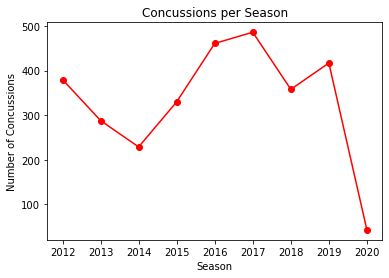

In [34]:
season_concussion = concussion_df.groupby('Season').count()
season_concussion = season_concussion[['Body Part']]
season_concussion.rename(columns={'Body Part': 'Concussion Count'})

# Create Bar graph
concussion_graph = season_concussion.plot(kind='line', title='Concussions per Season', marker='o', color='r', legend=False)
concussion_graph.set_xlabel('Season')
concussion_graph.set_ylabel('Number of Concussions')

plt.savefig("season_concussion_graph.png")
plt.show()

In [46]:
group_seasons_df = group_seasons_df.reset_index()
group_seasons_df = group_seasons_df[group_seasons_df["Season"] != 2020]
group_seasons_df

,index,Season,Body Part
0,0,2012,6538
1,1,2013,5287
2,2,2014,4961
3,3,2015,5337
4,4,2016,7418
5,5,2017,7556
6,6,2018,7535
7,7,2019,7049


In [60]:
bins = [2011, 2017, 2020]
bin_groups = ["2012-2017", "2018-2019"]

group_seasons_df["Injuries Before/After Rule Change"] = pd.cut(group_seasons_df['Season'], bins, labels=bin_groups)
rule_change_df = group_seasons_df.groupby('Injuries Before/After Rule Change')
rule_change_df.mean()

,index,Season,Body Part
Injuries Before/After Rule Change,,,
2012-2017,2.5,2014.5,6182.833333
2018-2019,6.5,2018.5,7292.000000


In [62]:
season_concussion = season_concussion.reset_index()
season_concussion = season_concussion[season_concussion["Season"] != 2020]
season_concussion

,Season,Body Part
0,2012,380
1,2013,288
2,2014,229
3,2015,330
4,2016,461
5,2017,486
6,2018,358
7,2019,417


In [63]:
bins = [2011, 2017, 2020]
bin_groups = ["2012-2017", "2018-2019"]

season_concussion["Concussions Before Rule Change"] = pd.cut(season_concussion['Season'], bins, labels=bin_groups)
rule_change_concussion = season_concussion.groupby('Concussions Before Rule Change')
rule_change_concussion.mean()

,Season,Body Part
Concussions Before Rule Change,,
2012-2017,2014.5,362.333333
2018-2019,2018.5,387.500000
